# 训练

In [1]:
# bash ./src/scripts/ultra_train.sh yolov8n

# 变量定义

In [1]:
# 参数
model_name = 'yolov8n'
model_stru = ''  # -p2
model_cfg = ''  # _aug
exp_name = f'{model_name}{model_stru}{model_cfg}'
USE_VAL = 'val' in model_cfg

# 路径
best_model_path = f'runs/ultralytics/{exp_name}/train/weights/best.pt'
train_log_path = f'runs/ultralytics/{exp_name}/train/results.csv'

print(f'{exp_name=}')
print(f'{best_model_path=}')
print(f'{train_log_path=}')


exp_name='yolov8n'
best_model_path='runs/ultralytics/yolov8n/train/weights/best.pt'
train_log_path='runs/ultralytics/yolov8n/train/results.csv'


# 日志分析-验证

['epoch', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']


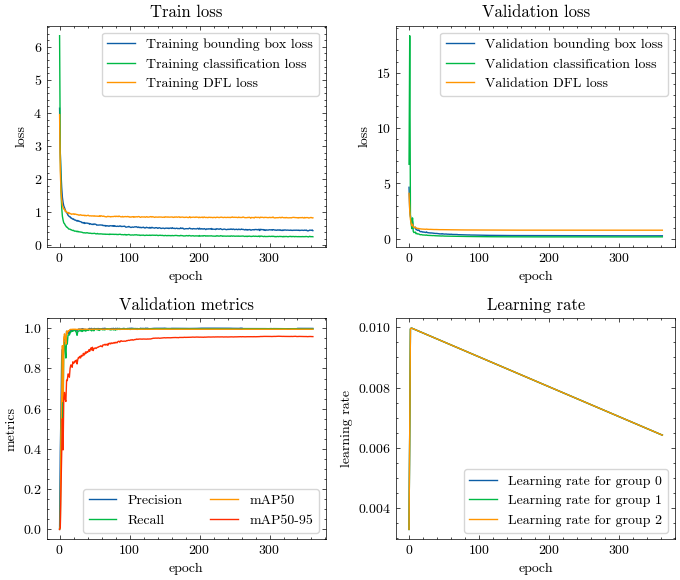

最大迭代次数363


In [10]:
from src.utils.read import read_ultrlytics_train_log_csv
from src.utils.plot import plot_ultralytics_yolov8_train_log

df_train_val = read_ultrlytics_train_log_csv(train_log_path)
plot_ultralytics_yolov8_train_log(df_train_val, exp_name=exp_name)
print(f'最大迭代次数{df_train_val.epoch.max()}')

In [3]:
# 参数设置
nms_conf = 0.001  # NMS-CONF阈值，过滤掉置信度过低的bbox，越大越严格
nms_iou = 0.6  # NMS-IOU阈值，过滤掉重合度过高的bbox，越小越严格
max_det = 100
use_half = False

# 测试

In [4]:
from ultralytics import YOLO
import torch

# 加载模型
model = YOLO(best_model_path)

# 保存结果
test_metrics = {}

# 在各测试集进行测试
for data_type in ['test_synth', 'test_real_nominal', 'test_real_edge']:

    print(f'正在测试: {data_type}')
    if not USE_VAL:
        data_yaml = f'datasets/cfg/lard_{data_type}.yaml'
    else:
        data_yaml = f'datasets/cfg/lard_val_{data_type}.yaml'

    print(data_yaml)

    metrics = model.val(
        data=data_yaml,
        imgsz=640,
        batch=256,
        save_json=True,  # 保存预测结果JSON
        conf=nms_conf,  # 检测的目标置信度阈值
        iou=nms_iou,  # NMS使用的IOU阈值
        max_det=max_det,  # 最大检测数量
        half=use_half,  # 半精度推理
        device=0,
        split='test',  # val时使用的数据集划分
        project='runs/ultralytics',
        name=f'{exp_name}/test_{data_type}',
        exist_ok=True
    )

    # test_metrics[data_type] = metrics

torch.cuda.empty_cache()


Ultralytics YOLOv8.0.203 🚀 Python-3.9.7 torch-2.1.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3090, 24260MiB)


正在测试: test_synth
datasets/cfg/lard_test_synth.yaml


YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /home/yeli/workspace/lard/lard-dataset/YoloFormat/test_synth/labels.cache... 2212 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2212/2212 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:24<00:00,  2.77s/it]
                   all       2212       2212       0.97      0.965      0.985      0.814
Speed: 0.9ms preprocess, 0.8ms inference, 0.0ms loss, 0.6ms postprocess per image
Saving runs/ultralytics/yolov8n/test_test_synth/predictions.json...
Results saved to runs/ultralytics/yolov8n/test_test_synth
Ultralytics YOLOv8.0.203 🚀 Python-3.9.7 torch-2.1.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3090, 24260MiB)


正在测试: test_real_nominal
datasets/cfg/lard_test_real_nominal.yaml


val: Scanning /home/yeli/workspace/lard/lard-dataset/YoloFormat/test_real_nominal/labels.cache... 1500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1500/1500 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:28<00:00,  4.83s/it]
                   all       1500       1500      0.926      0.832        0.9      0.666
Speed: 0.8ms preprocess, 0.5ms inference, 0.0ms loss, 0.7ms postprocess per image
Saving runs/ultralytics/yolov8n/test_test_real_nominal/predictions.json...
Results saved to runs/ultralytics/yolov8n/test_test_real_nominal
Ultralytics YOLOv8.0.203 🚀 Python-3.9.7 torch-2.1.0+cu118 CUDA:0 (NVIDIA GeForce RTX 3090, 24260MiB)


正在测试: test_real_edge
datasets/cfg/lard_test_real_edge.yaml


val: Scanning /home/yeli/workspace/lard/lard-dataset/YoloFormat/test_real_edge/labels.cache... 311 images, 0 backgrounds, 0 corrupt: 100%|██████████| 311/311 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:20<00:00, 10.30s/it]
                   all        311        311      0.945      0.551      0.684      0.431
Speed: 1.5ms preprocess, 1.3ms inference, 0.0ms loss, 0.3ms postprocess per image
Saving runs/ultralytics/yolov8n/test_test_real_edge/predictions.json...
Results saved to runs/ultralytics/yolov8n/test_test_real_edge


# 评估

In [6]:
import json
import pandas as pd
from src.utils.metric import coco_metrics_name
from src.utils.metric import cal_coco_metrics
from src.utils.metric import get_coco_imgname_2_imgid


# 保存评价结果对象
coco_evals = {}

# 构造dataframe
all_metrics = {}

# 在各测试集进行推理
for data_type in ['test_synth', 'test_real_nominal', 'test_real_edge']:

    print(f'正在评价: {data_type}')
    annotation_file = f'datasets/lard/annotations/instances_{data_type}.json'
    prediction_file = f'runs/ultralytics/{exp_name}/test_{data_type}/predictions.json'
    prediction_modified_file = f'runs/ultralytics/{exp_name}/test_{data_type}/predictions_modified.json'

    imgname_2_imgid = get_coco_imgname_2_imgid(annotation_file)
    
    # 原始预测结果文件
    with open(prediction_file, 'r') as f:
        pred = json.load(f)

    for item in pred:
        item['image_id'] = imgname_2_imgid[item['image_id']]

    # 修改后的预测结果
    with open(prediction_modified_file, 'w') as f:
        json.dump(pred, f)

    # 指标计算
    cocoEval = cal_coco_metrics(annotation_file, prediction_modified_file)
    coco_evals[data_type] = cocoEval
    all_metrics[data_type] = cocoEval.stats

all_metrics = pd.DataFrame(all_metrics, index=coco_metrics_name)
display(all_metrics.round(3))


正在评价: test_synth
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.53s).
Accumulating evaluation results...
DONE (t=0.09s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.763
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.967
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.875
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.628
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.822
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.793
 Average Recall     (AR) @[ IoU=0.50:0.95 | 

,test_synth,test_real_nominal,test_real_edge
"AP (IoU=0.50:0.95, area=all, maxDets=100)",0.763,0.614,0.385
"AP (IoU=0.50, area=all, maxDets=100)",0.967,0.866,0.630
"AP (IoU=0.75, area=all, maxDets=100)",0.875,0.682,0.388
"AP (IoU=0.50:0.95, area=small, maxDets=100)",-1.000,0.198,0.156
"AP (IoU=0.50:0.95, area=medium, maxDets=100)",0.628,0.490,0.293
"AP (IoU=0.50:0.95, area=large, maxDets=100)",0.822,0.814,0.476
"AR (IoU=0.50:0.95, area=all, maxDets=1)",0.793,0.637,0.406
"AR (IoU=0.50:0.95, area=all, maxDets=10)",0.798,0.644,0.422
"AR (IoU=0.50:0.95, area=all, maxDets=100)",0.798,0.644,0.422
"AR (IoU=0.50:0.95, area=small, maxDets=100)",-1.000,0.239,0.197


In [8]:
from src.utils.plot import plot_pr_curve

plot_pr_curve(coco_evals, iou_indices=[0, 2, 4, 6, 8], exp_name=exp_name)

test_synth


<Figure size 800x400 with 2 Axes>

test_real_nominal


<Figure size 800x400 with 2 Axes>

test_real_edge


<Figure size 800x400 with 2 Axes>

# 测速

In [9]:
import torch
from ultralytics import YOLO
import glob
from tqdm import tqdm


# 加载模型
model = YOLO(best_model_path)

# 保存结果
all_speed = {}

# 设备预热
num_pre = 500
path = f'datasets/lard/YoloFormat/test_synth/images/'
image_paths = glob.glob(f"{path}*")
for image_path in tqdm(image_paths[:num_pre], ncols=100, desc="预热"):
    _ = model.predict(
        source=image_path,
        imgsz=640,
        conf=nms_conf,
        iou=nms_iou,
        max_det=max_det,
        half=use_half,
        device=0,
        verbose=False
    )
print("预热完成")

# 在各测试集进行推理
for data_type in ['test_synth', 'test_real_nominal', 'test_real_edge']:

    path = f'datasets/lard/YoloFormat/{data_type}/images/'
    image_paths = glob.glob(f"{path}*")
    infer_time = []

    for image_path in tqdm(image_paths, ncols=100, desc="推理"):
        result = model.predict(
            source=image_path,
            imgsz=640,
            conf=nms_conf,
            iou=nms_iou,
            max_det=max_det,
            half=use_half,
            device=0,
            verbose=False
        )
        # 累加当前推理时间：前处理, 前向传播, 后处理
        infer_time.append(sum(list(result[0].speed.values())))

    average_time = sum(infer_time)/len(infer_time)  # 平均时间
    fps = 1000/average_time  # 帧率

    # 存储结果
    all_speed[data_type] = [average_time, fps]

    # 输出信息
    print(f"数据集: {data_type}")
    print(f"平均推理时间: {average_time:.2f} ms")
    print(f"平均FPS: {fps:.2f}")

# 显存清理
torch.cuda.empty_cache()
print('测速结束')


预热:   0%|                                                                 | 0/500 [00:00<?, ?it/s]

预热: 100%|███████████████████████████████████████████████████████| 500/500 [00:28<00:00, 17.44it/s]


预热完成


推理: 100%|█████████████████████████████████████████████████████| 2212/2212 [02:01<00:00, 18.15it/s]


数据集: test_synth
平均推理时间: 7.60 ms
平均FPS: 131.62


推理: 100%|█████████████████████████████████████████████████████| 1500/1500 [01:53<00:00, 13.27it/s]


数据集: test_real_nominal
平均推理时间: 6.86 ms
平均FPS: 145.84


推理: 100%|███████████████████████████████████████████████████████| 311/311 [00:23<00:00, 13.48it/s]

数据集: test_real_edge
平均推理时间: 6.85 ms
平均FPS: 146.07
测速结束


In [10]:
# 构建dataframe
all_speed = pd.DataFrame(
    data=all_speed,
    index=['Average inference time (ms)', 'FPS']
)

# 合并测试指标
results = pd.concat([all_metrics, all_speed], axis=0)
results.index.name = 'metrics'
results.to_csv(
    f'results/tables/metrics/metrics_{exp_name}.csv',
    float_format='%.3f')
display(results.round(3))

,test_synth,test_real_nominal,test_real_edge
metrics,,,
"AP (IoU=0.50:0.95, area=all, maxDets=100)",0.763,0.614,0.385
"AP (IoU=0.50, area=all, maxDets=100)",0.967,0.866,0.630
"AP (IoU=0.75, area=all, maxDets=100)",0.875,0.682,0.388
"AP (IoU=0.50:0.95, area=small, maxDets=100)",-1.000,0.198,0.156
"AP (IoU=0.50:0.95, area=medium, maxDets=100)",0.628,0.490,0.293
"AP (IoU=0.50:0.95, area=large, maxDets=100)",0.822,0.814,0.476
"AR (IoU=0.50:0.95, area=all, maxDets=1)",0.793,0.637,0.406
"AR (IoU=0.50:0.95, area=all, maxDets=10)",0.798,0.644,0.422
"AR (IoU=0.50:0.95, area=all, maxDets=100)",0.798,0.644,0.422


# 写入检测结果

In [13]:
from src.utils.database import write_detections_2_database
write_detections_2_database(lib_type='ultralytics', exp_name=exp_name)


loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


正在写入test_synth检测结果:   0%|                                          | 0/2212 [00:00<?, ?it/s]

正在写入test_synth检测结果: 100%|██████████████████████████████| 2212/2212 [00:06<00:00, 364.61it/s]


predictions_yolov8n: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


正在写入test_real_nominal检测结果: 100%|███████████████████████| 1500/1500 [00:02<00:00, 503.69it/s]


predictions_yolov8n: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


正在写入test_real_edge检测结果: 100%|████████████████████████████| 311/311 [00:00<00:00, 491.19it/s]

predictions_yolov8n: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)


In [12]:
from src.utils.database import delete_detections_from_database
delete_detections_from_database(exp_name=exp_name)


删除字段: ['predictions_yolov8n']
删除字段: ['predictions_yolov8n']
删除字段: ['predictions_yolov8n']
